<a href="https://colab.research.google.com/github/CesiaFlores09/PROGRAMACION-III/blob/master/Tienda_ropa_Clasificasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar las librerias
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#cargamos en dataset de entrenamiento y prueba, los numeros del 0-9
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True,with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"],dataset["test"]

In [32]:
imagen_letras = ["Camiseta/pequeña","Pantalón","Saco","Vestido","Abrigo","Sandalia","Camisa","Zapatilla","Bolso","Botín"]

In [4]:
#pasamos en variables los datos de ejemplo de entrenamiento y prueba
imagen_ejemplo_entrenamiento = metadata.splits["train"].num_examples
imagen_ejemplo_prueba = metadata.splits["test"].num_examples
print(imagen_ejemplo_entrenamiento, imagen_ejemplo_prueba)

60000 10000


In [5]:
#vamos a pasar los numeros(pixeles) que van de 0 - 255 de 0 - 1
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [6]:
#Llamamos nuestra imagen normalizadora para convertir los numeros(pixeles) de 0 - 255 sean de 0 - 1
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [7]:
#crear la estructura de nuestra red neuronal
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape= (28,28,1)), 
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) 

In [8]:
#compilamos nuestro modelo
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
#realizaremos el entrenamiento por lote
batchsize= 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(imagen_ejemplo_entrenamiento).batch(batchsize) 
datos_prueba = datos_prueba.batch(batchsize)

In [10]:
#hacemos el entrenamiento de nuestra red neuronal con los datos de entrenamiento
modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(imagen_ejemplo_entrenamiento/batchsize))

Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.5093 - accuracy: 0.8211
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3819 - accuracy: 0.8610
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3466 - accuracy: 0.8745
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3163 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3034 - accuracy: 0.8858


In [11]:
#evaluar nuestro modelo con los datos de prueba
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(imagen_ejemplo_prueba/batchsize))
print(test_loss*100, test_accuracy*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.3565 - accuracy: 0.8737
35.64956486225128 87.37000226974487


In [33]:
#graficar la salida para evaluar el aprendizaje
def graficar_images(i,predictions_array, true_labels, images):
  predictions_array, true_labels,img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "purple"
  else:
    color = "red"
  plt.xlabel("Prediccion: {}".format(imagen_letras[predicted_label]), color=color)

In [13]:
#convertir las imagenes de tensores en matrices con numpy
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

In [14]:
#graficar las matrices en imganes con matplotlib para ver su acierto
def graficar_valores_matrices(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "blue")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("pink")

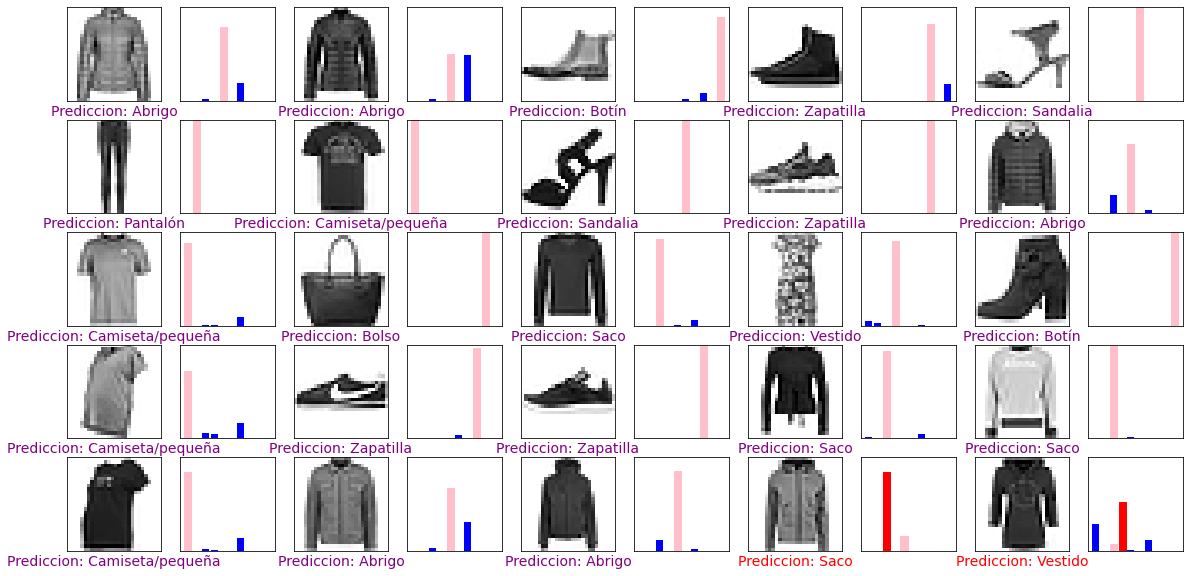

In [34]:
#llamamos los metodos para la graficacion de las imagenes y la grafica de barras
numfilas = 5
numcols = 5
numimages = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimages):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_images(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matrices(i, predicciones, etiquetas_prueba)

plt.show()

In [73]:
# Imagen subida por el usuario
imagen_Subida = cv2.imread('/content/zapatillas.png', 0)
imagen_Subida = tf.cast(imagen_Subida, tf.float32)
imagen_Subida = imagen_Subida / 255
imagen_Subida = np.expand_dims(imagen_Subida, axis=0)



In [74]:
prdlocal = modelo.predict(imagen_Subida, batch_size=1)
tagLocalTest = np.argmax(prdlocal)

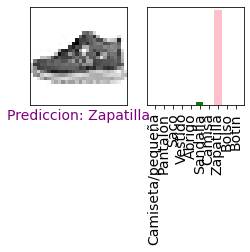

In [75]:
#Datos de salida y grafica de prediccion
columns = 2
rows = 2
plt.figure(figsize=(2*2*columns, 2*rows))
plt.subplot(rows, 2*columns, 2*0+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imagen_Subida[0,...], cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(imagen_letras[tagLocalTest]), color='purple')

plt.subplot(rows, 2*columns, 2*0+2)
plt.grid(False)
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), prdlocal[0], color = "green")
plt.ylim([0,1])
thisplot[tagLocalTest].set_color("red")
thisplot[tagLocalTest].set_color("pink")
plt.xticks(range(10), imagen_letras, rotation=90)

plt.rcParams['font.size'] = 14
plt.show()